In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Getting the data from json folder
data=pd.read_json('endsong.json')
data=pd.DataFrame(data)
data.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [5]:
#Meta Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10265 entries, 0 to 10264
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 10265 non-null  object 
 1   username                           10265 non-null  object 
 2   platform                           10265 non-null  object 
 3   ms_played                          10265 non-null  int64  
 4   conn_country                       10265 non-null  object 
 5   ip_addr_decrypted                  10265 non-null  object 
 6   user_agent_decrypted               9905 non-null   object 
 7   master_metadata_track_name         5103 non-null   object 
 8   master_metadata_album_artist_name  5103 non-null   object 
 9   master_metadata_album_album_name   5103 non-null   object 
 10  spotify_track_uri                  5103 non-null   object 
 11  episode_name                       22 non-null     obj

In [6]:
#Droping unwanted columns
data=data.drop(columns=['username','conn_country','incognito_mode'])
data.head()

,ts,platform,ms_played,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp
0,2022-01-20T02:32:42Z,"Android OS 11 API 30 (OPPO, CPH2263)",218131,27.61.190.77,unknown,Hero (feat. Christina Perri) - Deep Mix,Cash Cash,Hero (feat. Christina Perri),spotify:track:7os1J5P6JqIxKSxq71QuQC,None,None,None,trackdone,trackdone,False,NaN,False,1642645741638
1,2023-01-04T08:45:44Z,android,243329,27.61.255.60,unknown,None,None,None,None,None,None,None,trackdone,trackdone,True,0.0,False,1672821700
2,2022-05-30T13:11:12Z,Windows 10 (10.0.22000; x64; AppX),215320,1.186.12.186,unknown,Pucho Na Yaar Kya Hua - Unwind Instrumental,Shomu Seal,"Bollywood Love Instrumentals, Vol. 2",spotify:track:3ZLgNGZMahsDLIuOAJx3TV,None,None,None,trackdone,trackdone,False,NaN,False,1653916056422
3,2022-02-28T08:06:59Z,"Android OS 12 API 31 (OPPO, CPH2263)",203011,223.238.237.32,unknown,Hall of Fame (feat. will.i.am),The Script,#3 Deluxe Version,spotify:track:7wMq5n8mYSKlQIGECKUgTX,None,None,None,appload,trackdone,True,NaN,False,1646035406714
4,2022-10-06T07:47:42Z,"Android-tablet OS 12 API 31 (OPPO, CPH2263)",1160,223.186.125.171,unknown,Hero (feat. Christina Perri) - Deep Mix,Cash Cash,Hero (feat. Christina Perri),spotify:track:7os1J5P6JqIxKSxq71QuQC,None,None,None,fwdbtn,unexpected-exit-while-paused,True,NaN,False,1665036898489


In [7]:
#Renaming the columns for easy interpretation
data=data.rename(columns={'ms_played':'played_time','master_metadata_track_name':'Track_name','master_metadata_album_artist_name':'Artist','master_metadata_album_album_name':'Album'})
data.head()

,ts,platform,played_time,ip_addr_decrypted,user_agent_decrypted,Track_name,Artist,Album,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp
0,2022-01-20T02:32:42Z,"Android OS 11 API 30 (OPPO, CPH2263)",218131,27.61.190.77,unknown,Hero (feat. Christina Perri) - Deep Mix,Cash Cash,Hero (feat. Christina Perri),spotify:track:7os1J5P6JqIxKSxq71QuQC,None,None,None,trackdone,trackdone,False,NaN,False,1642645741638
1,2023-01-04T08:45:44Z,android,243329,27.61.255.60,unknown,None,None,None,None,None,None,None,trackdone,trackdone,True,0.0,False,1672821700
2,2022-05-30T13:11:12Z,Windows 10 (10.0.22000; x64; AppX),215320,1.186.12.186,unknown,Pucho Na Yaar Kya Hua - Unwind Instrumental,Shomu Seal,"Bollywood Love Instrumentals, Vol. 2",spotify:track:3ZLgNGZMahsDLIuOAJx3TV,None,None,None,trackdone,trackdone,False,NaN,False,1653916056422
3,2022-02-28T08:06:59Z,"Android OS 12 API 31 (OPPO, CPH2263)",203011,223.238.237.32,unknown,Hall of Fame (feat. will.i.am),The Script,#3 Deluxe Version,spotify:track:7wMq5n8mYSKlQIGECKUgTX,None,None,None,appload,trackdone,True,NaN,False,1646035406714
4,2022-10-06T07:47:42Z,"Android-tablet OS 12 API 31 (OPPO, CPH2263)",1160,223.186.125.171,unknown,Hero (feat. Christina Perri) - Deep Mix,Cash Cash,Hero (feat. Christina Perri),spotify:track:7os1J5P6JqIxKSxq71QuQC,None,None,None,fwdbtn,unexpected-exit-while-paused,True,NaN,False,1665036898489


In [22]:
df=data.groupby(by='platform').played_time.sum()
df

platform
Android OS 11 API 30 (OPPO, CPH2263)               33644236
Android OS 12 API 31 (OPPO, CPH2263)              201240973
Android-tablet OS 12 API 31 (OPPO, CPH2263)       403191594
Windows 10 (10.0.22000; x64; AppX)                139302492
android                                           628446753
web_player windows 10;chrome 105.0.0.0;desktop     39594706
web_player windows 10;chrome 106.0.0.0;desktop     17781705
windows                                           142924655
Name: played_time, dtype: int64

<AxesSubplot: ylabel='played_time'>

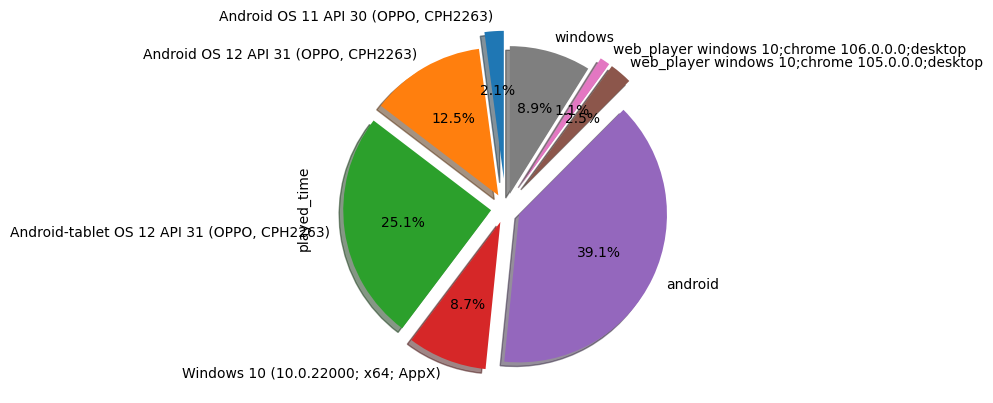

In [24]:
df.plot(kind='pie',explode=(0.2,0.1,0.1,0.1,0.1,0.2,0.2,0.1),autopct='%1.1f%%',shadow=True, startangle=90)